In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from Piplines import Models, inverses, preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    MaxAbsScaler,
    OneHotEncoder,
    OrdinalEncoder,
    FunctionTransformer,
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


train = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/Data_set.csv",
)
train.drop(columns="Unnamed: 0", inplace=True)

/tmp/ipykernel_88417/3683223075.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
x_train, x_test, y_train, y_test = train_test_split(
    train.drop("SalePrice", axis=1),
    train["SalePrice"],
    test_size=0.5,
    random_state=100,
)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Linear Regression


### scaled linear model


In [3]:
scaled_linear_model = Models.Linear_Scaled_model(x_train, y_train)

In [4]:
scaled_linear_model

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', LinearRegression())])

In [5]:
x_train_preproc, y_train_preproc = preprocess.scaled_linear_model(X=x_train, Y=y_train)

x_test_preproc, y_test_preproc = preprocess.scaled_linear_model(X=x_test, Y=y_test)


train_prediction = scaled_linear_model.predict(x_train_preproc)
test_prediction = scaled_linear_model.predict(x_test_preproc)

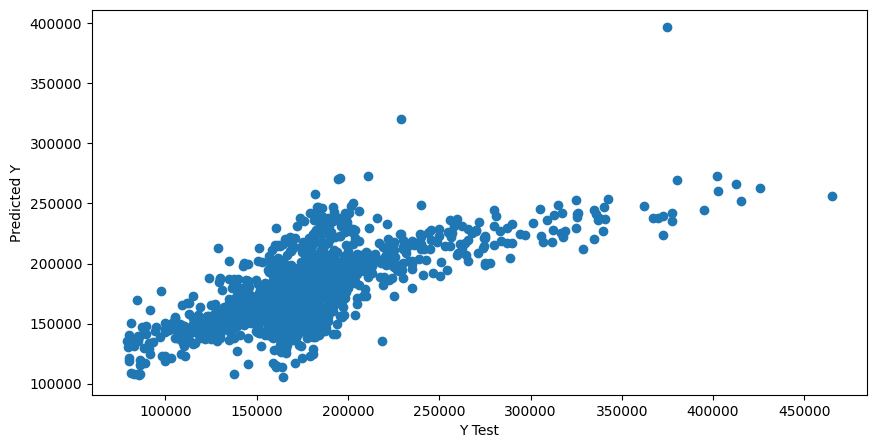

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

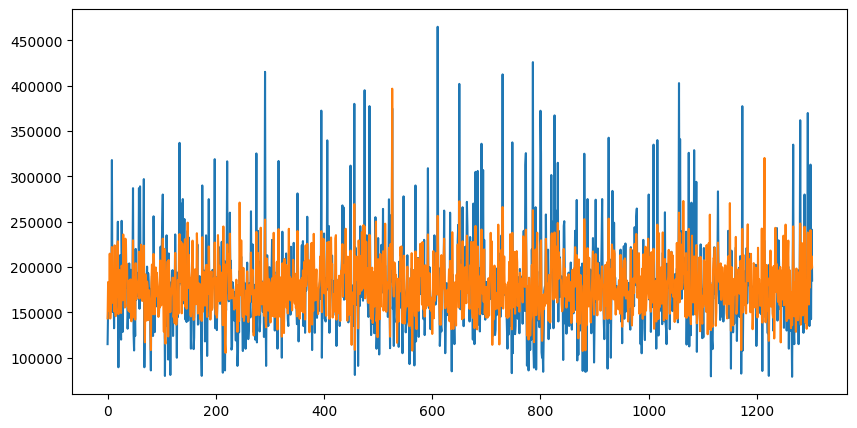

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [8]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 25746.07298680361
MSE: 1189982199.434038
RMSE: 34496.118614041756


# linear model Scaled_log data


In [11]:
linear_scaled_loged_model = Models.Linear_Scaled_loged_model(x_train, y_train)

In [12]:
linear_scaled_loged_model

Pipeline(steps=[('Column Transformer For Y data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Log for y_tran',
                                                  FunctionTransformer(func=<ufunc 'log10'>),
                                                  []),
                                                 ('SQRT for y_tran',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  [])])),
                ('Standard Scaler For x data', StandardScaler()),
                ('Linear Regression ', LinearRegression())])

In [13]:
x_train_preproc, y_train_preproc = preprocess.Scaled_loged_linear_model(
    X=x_train, Y=y_train
)

x_test_preproc, y_test_preproc = preprocess.Scaled_loged_linear_model(
    X=x_test, Y=y_test
)


train_prediction = linear_scaled_loged_model.predict(x_train_preproc)
test_prediction = linear_scaled_loged_model.predict(x_test_preproc)

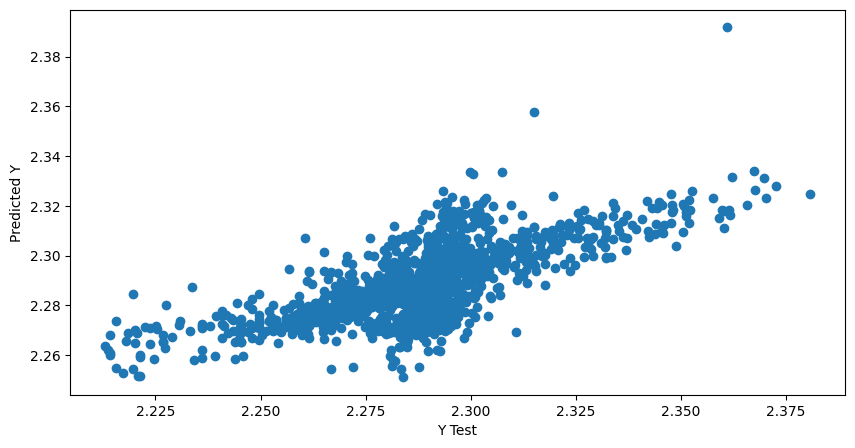

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

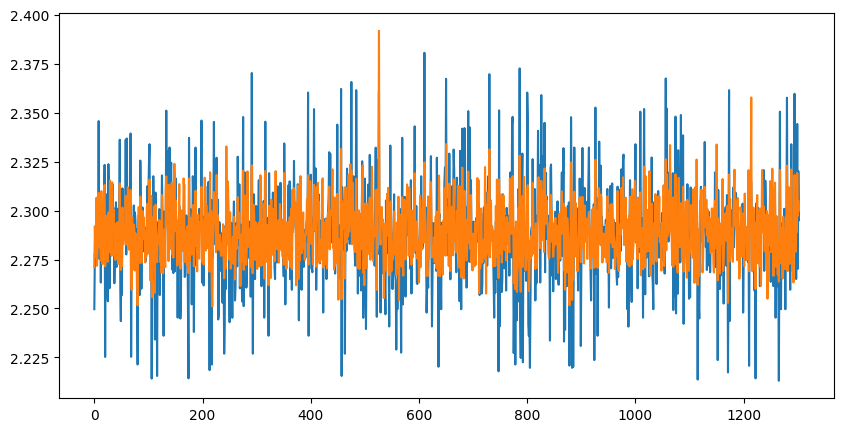

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [16]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 0.01360003541577645
MSE: 0.00029614165122281665
RMSE: 0.017208766696739677


# Regularization Models

### Lasso & Ridge


### Ridge


In [20]:
ridge = Models.Ridge_model(x_train, y_train)

MAE: 25350.210215908683
MSE: 1176539028.5427084
RMSE: 34300.71469434286

MAE: 25350.23073674715
MSE: 1176539033.6623886
RMSE: 34300.71476897221

MAE: 25350.883690288385
MSE: 1176545120.7704246
RMSE: 34300.80350036169

MAE: 25351.228792060043
MSE: 1176553823.3169646
RMSE: 34300.93035643442

MAE: 25351.68092882378
MSE: 1176572727.4429922
RMSE: 34301.205918203406

MAE: 25351.767620620714
MSE: 1176577526.181728
RMSE: 34301.275868132485

MAE: 25352.00934150995
MSE: 1176590801.0093522
RMSE: 34301.46937099564

0


In [21]:
ridge

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', Ridge(alpha=0))])

### best alpha is 0, that means that there is no different betwenn it and linear regression, so i will skip it


# Lasso


In [23]:
lasso = Models.Lasso_model(x_train, y_train)

MAE: 25350.210223558683
MSE: 1176539028.5427086
RMSE: 34300.71469434287

MAE: 25350.210231407214
MSE: 1176539028.5427098
RMSE: 34300.71469434288

MAE: 25350.21023914493
MSE: 1176539028.542712
RMSE: 34300.71469434292

MAE: 25350.210246275896
MSE: 1176539028.542715
RMSE: 34300.71469434296

MAE: 25350.210253993184
MSE: 1176539028.542719
RMSE: 34300.71469434301

MAE: 25350.21026143335
MSE: 1176539028.5427232
RMSE: 34300.71469434308

MAE: 25350.210270372896
MSE: 1176539028.5427291
RMSE: 34300.714694343165

MAE: 25350.210277473117
MSE: 1176539028.5427353
RMSE: 34300.71469434325

0


/home/ahmed/.local/lib/python3.10/site-packages/sklearn/base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ahmed/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.665e+11, tolerance: 2.811e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

## Bad result from Lasso model, skiiiip


## log scaled to lasso and ridge


In [24]:
ridge_log_scaled = Models.Ridge_model_log_scaled(x_train, y_train)

MAE: 0.013154918625069484
MSE: 0.00028047335673159505
RMSE: 0.016747338795510023

MAE: 0.013154917495882023
MSE: 0.0002804733567488255
RMSE: 0.016747338796024445

MAE: 0.013154576557209755
MSE: 0.0002804748586972276
RMSE: 0.016747383637369377

MAE: 0.013154345049254956
MSE: 0.0002804774422751294
RMSE: 0.016747460770968517

MAE: 0.013153755618289515
MSE: 0.00028048888500782203
RMSE: 0.0167478023933835

MAE: 0.013153550317035844
MSE: 0.00028049527642761215
RMSE: 0.01674799320598179

MAE: 0.013153290133754818
MSE: 0.00028050661551904413
RMSE: 0.016748331723459627

MAE: 0.013153103230764098
MSE: 0.0002805198923605619
RMSE: 0.016748728081874217

MAE: 0.013153006553240533
MSE: 0.00028052973612850316
RMSE: 0.016749021945430223

0


In [25]:
ridge_log_scaled

Pipeline(steps=[('Column Transformer For Y data',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Log for y_tran',
                                                  FunctionTransformer(func=<ufunc 'log10'>),
                                                  []),
                                                 ('SQRT for y_tran',
                                                  FunctionTransformer(func=<ufunc 'sqrt'>),
                                                  [])])),
                ('Standar dScaler', StandardScaler()),
                ('Linear Regression ', Ridge(alpha=0))])

### alpha is 0, nothing changed


# DecisionTreeRegressor


In [27]:
DTR = Models.DecisionTreeRegressor_Scaled_model(x_train, y_train)
DTR

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', DecisionTreeRegressor(random_state=0))])

In [28]:
x_train_preproc, y_train_preproc = preprocess.scaled_linear_model(X=x_train, Y=y_train)

x_test_preproc, y_test_preproc = preprocess.scaled_linear_model(X=x_test, Y=y_test)


train_prediction = DTR.predict(x_train_preproc)
test_prediction = DTR.predict(x_test_preproc)

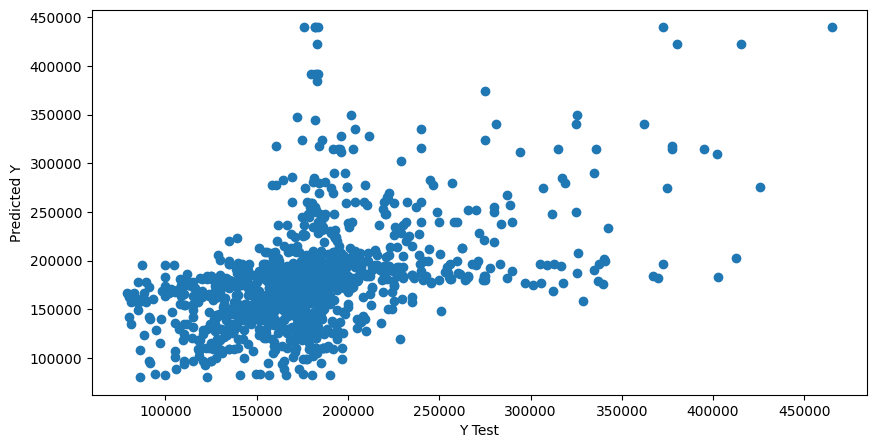

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

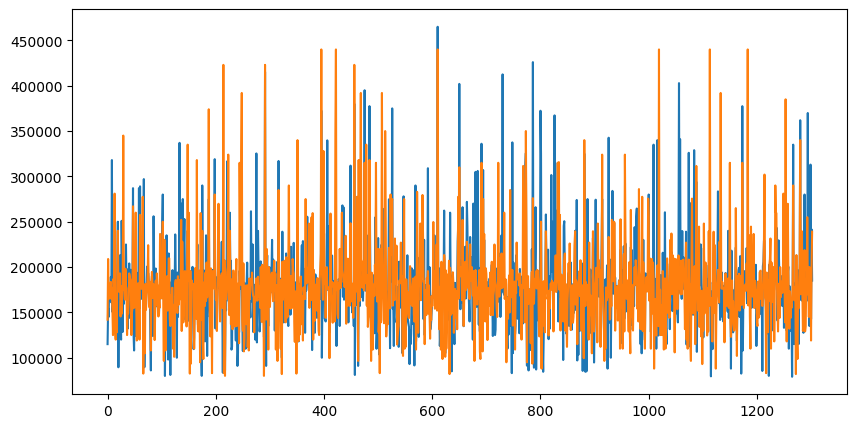

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [37]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 34001.61013046815
MSE: 2513602700.359171
RMSE: 50135.84247182021


In [48]:
DTR = Models.DecisionTreeRegressor_Scaled_loged_model(x_train, y_train)
DTR

Pipeline(steps=[('Standar dScaler', StandardScaler()),
                ('Linear Regression ', DecisionTreeRegressor(random_state=0))])

In [49]:
x_train_preproc, y_train_preproc = preprocess.Scaled_loged_linear_model(
    X=x_train, Y=y_train
)

x_test_preproc, y_test_preproc = preprocess.Scaled_loged_linear_model(
    X=x_test, Y=y_test
)


train_prediction = DTR.predict(x_train_preproc)
test_prediction = DTR.predict(x_test_preproc)

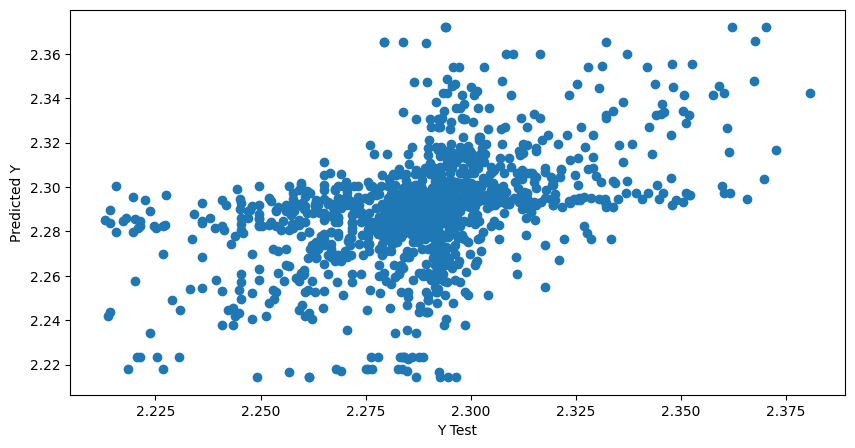

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_preproc, test_prediction)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y")
plt.show()

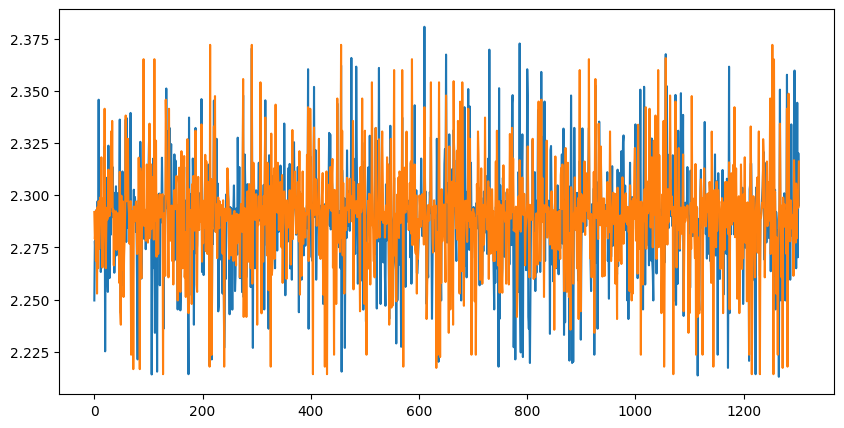

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_preproc, label="Test")
plt.plot(test_prediction, label="predict")
plt.show()

In [52]:
MAE = mean_absolute_error(y_test_preproc, test_prediction)
MSE = mean_squared_error(y_test_preproc, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test_preproc, test_prediction))
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

MAE: 0.01792488474768984
MSE: 0.0006189796513028664
RMSE: 0.024879301664292478
